# 来自Bitly的USA.gov数据

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
import json
path = 'C:/Users/SOUYIDAI/Downloads/pydata-book-2nd-edition/datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]
frame = pd.DataFrame(records)
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


“tz”：时区 “a”：浏览器、设备、应用程序相关信息

In [34]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [35]:
#检查空字段
frame.isnull().sum()

_heartbeat_    3440
a               120
al              466
c               641
cy              641
g               120
gr              641
h               120
hc              120
hh              120
kw             3467
l               120
ll              641
nk              120
r               120
t               120
tz              120
u               120
dtype: int64

In [41]:
#tz代表时区,找到每个字段的个数
time_zones = frame['tz'].value_counts()
time_zones[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [48]:
#NA替换为‘MISSING’，空值替换为‘unknown’
clean_tz = frame['tz'].fillna('MISSING')
clean_tz[clean_tz =='']= 'unknown'
tz_counts = clean_tz.value_counts()

In [49]:
tz_counts[:10]

America/New_York       1251
unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
MISSING                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

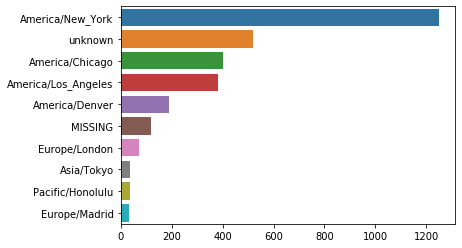

In [52]:
#用seaborn包将tz的前十个创建水平柱状图
import seaborn as sns
sns.barplot(y=tz_counts[:10].index,x=tz_counts[:10].values)

In [56]:
#移除a中缺失数据
cframe = frame[frame.a.notnull()]
cframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    0 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 510.6+ KB


In [58]:
#将a字段是否有“Window”(有：Windows 没有：Not Windows')的结果放入cframe的“os”字段
cframe['os']=np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
cframe['os'][:5]

C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [59]:
#根据时区time_zones和新得到的操作系统列表os对数据进行分组
by_tz_os = cframe.groupby(['tz', 'os'])

In [60]:
#分组计数，并对数据进行整理
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [62]:
#选取最常出现的时区，首先把agg_counts按照列求和找到个数，然后根据argsort函数返回排序后的索引位置
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [71]:
#通过take截取最后10行最大列
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [72]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [73]:
#根据count_subset画堆积柱状图，先整理数据
count_subset = count_subset.stack()
count_subset[:6]

tz                 os         
America/Sao_Paulo  Not Windows    13.0
                   Windows        20.0
Europe/Madrid      Not Windows    16.0
                   Windows        19.0
Pacific/Honolulu   Not Windows     0.0
                   Windows        36.0
dtype: float64

In [74]:
#对原数据进行处理
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:6]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0


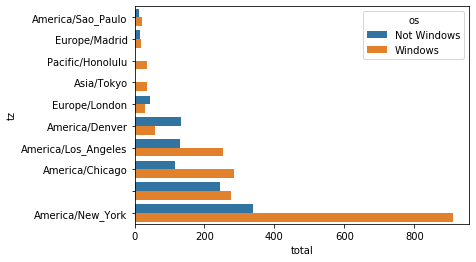

In [83]:
sns.barplot(y='tz',x='total',  hue='os', data=count_subset)

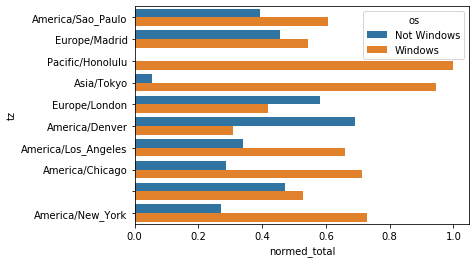

In [78]:
#新加算法，求占比normed_total=total/total.sum()
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
results = count_subset.groupby('tz').apply(norm_total)
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [79]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

# MovieLens 1M数据集

In [85]:
#MovieLens 1M数据集含有来自6000名用户对4000部电影的100万条评分数据。它分为三个表：评分、用户信息和电影信息。
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('C:/Users/SOUYIDAI/Downloads/pydata-book-2nd-edition/datasets/movielens/users.dat', sep='::',header=None, names=unames)
users[:5]

C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [86]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('C:/Users/SOUYIDAI/Downloads/pydata-book-2nd-edition/datasets/movielens/ratings.dat', sep='::',header=None, names=rnames)
ratings[:5]

C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [88]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('C:/Users/SOUYIDAI/Downloads/pydata-book-2nd-edition/datasets/movielens/movies.dat', sep='::',header=None, names=mnames)
movies[:5]

C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
#年龄和职业是以编码形式给出的，它们的具体含义参考该数据集的README文件,将三个表格合并
data = pd.merge(pd.merge(users,ratings),movies)
data[:5]

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [95]:
#rating表按性别计算平均得分
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [96]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [99]:
#按照电影分组，找到有评分的个数
ratings_by_title = data.groupby('title').size()
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [100]:
active_titles = ratings_by_title.index[ratings_by_title >=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [104]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [113]:
#对F进行降序排列
top_female_ratings = mean_ratings.sort_values(by='F',ascending=False)
top_female_ratings[:5]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [114]:
#找出男女评分差异最大的电影
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:5]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [115]:
#反向取出前10行
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [116]:
#按照标准差查找
rating_std_by_title = data.groupby('title')['rating'].std()

In [119]:
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [120]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# 1880-2010年间全美婴儿姓名

In [3]:
names1880 = pd.read_csv('C:/Users/SOUYIDAI/Downloads/pydata-book-2nd-edition/datasets/babynames/yob1880.txt', names=['name','sex','births'])
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [64]:
# 将所有年限的散落txt合并在一起，并加上year字段
years = range(1880,2011)
pieces= []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'C:/Users/SOUYIDAI/Downloads/pydata-book-2nd-edition/datasets/babynames/yob%d.txt'% year
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)
names[:10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [103]:
pieces

[          name sex  births  year      prop
 0         Mary   F    7065  1880  0.077643
 1         Anna   F    2604  1880  0.028618
 2         Emma   F    2003  1880  0.022013
 3    Elizabeth   F    1939  1880  0.021309
 4       Minnie   F    1746  1880  0.019188
 5     Margaret   F    1578  1880  0.017342
 6          Ida   F    1472  1880  0.016177
 7        Alice   F    1414  1880  0.015540
 8       Bertha   F    1320  1880  0.014507
 9        Sarah   F    1288  1880  0.014155
 10       Annie   F    1258  1880  0.013825
 11       Clara   F    1226  1880  0.013474
 12        Ella   F    1156  1880  0.012704
 13    Florence   F    1063  1880  0.011682
 14        Cora   F    1045  1880  0.011484
 15      Martha   F    1040  1880  0.011429
 16       Laura   F    1012  1880  0.011122
 17      Nellie   F     995  1880  0.010935
 18       Grace   F     982  1880  0.010792
 19      Carrie   F     949  1880  0.010429
 20       Maude   F     858  1880  0.009429
 21       Mabel   F     808  188

In [65]:
total_births =pd.pivot_table(names,index=['year'],columns=['sex'], aggfunc=sum)
total_births.tail()

births         
sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

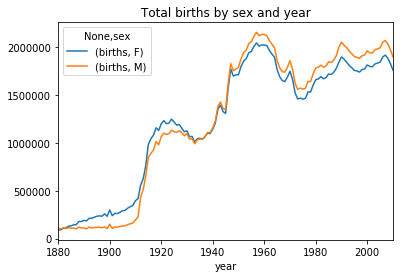

In [66]:
total_births.plot(title='Total births by sex and year')

In [67]:
#插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names[:5]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [68]:
#有效性检查，是否相加为1
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
1996  F      1.0
      M      1.0
1997  F      1.0
      M      1.0
1998  F      1.0
      M      1.0
1999  F      1.0
      M      1.0
2000  F      1.0
      M      1.0
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
    

In [69]:
#取出该数据的一个子集：每对sex/year组合的前1000个名字。
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000[:5]

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [70]:
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)
top1000[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [71]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births',ascending=False)[:1000])
top1000_1 = pd.concat(pieces, ignore_index=True)
top1000_1[:10]

C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site

C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site

C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SOUYIDAI\Anaconda3\lib\site

C:\Users\SOUYIDAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


#### 针对这个top1000数据集进行分析

### 分析命名趋势

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000002B3289E8>,
      dtype=object)

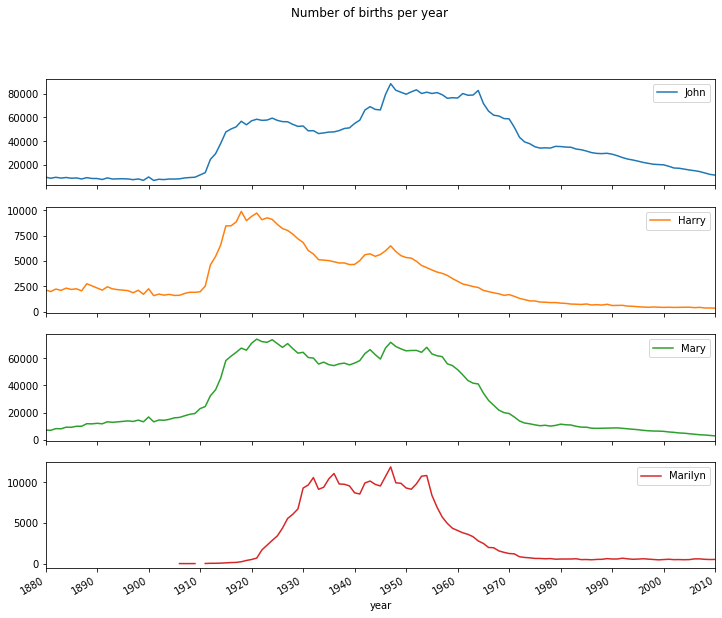

In [72]:
total_births = top1000.pivot_table('births', index='year',columns='name',aggfunc=sum)
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year", xticks=range(1880, 2020, 10))

### 评估命名多样性的增长

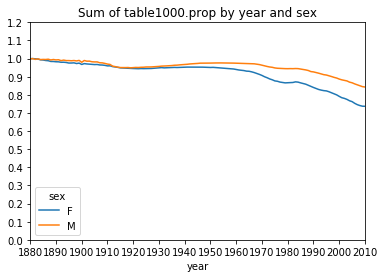

In [73]:
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

#### 名字多样性增长

In [74]:
#是计算占总出生人数前50%的不同名字的数量
boys = top1000[top1000.sex == 'M']
df = boys[boys.year == 2010]
df[:5]

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [75]:
#对prop降序排列之后，计算前多少个名字cumsum够50%，再通过searchsorted找出0.5应该被插在哪个位置才能保证不破坏顺序
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [76]:
prop_cumsum.values.searchsorted(0.5)

116

In [78]:
#数组是从0开始的，所以需要+1
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [85]:
#找出各个年份，按照性别分组，前50%中不同姓名的个数
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


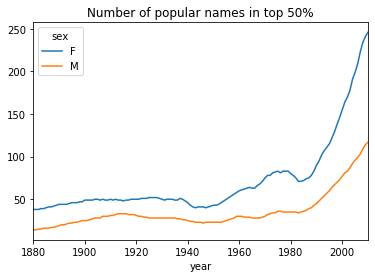

In [86]:
diversity.plot(title='Number of popular names in top 50%')

#### 最后一个字母”的变革

In [87]:
#将全部出生数据在年度、性别以及末字母上进行聚合：
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters,columns=['sex', 'year'], aggfunc=sum)
subtable = table.reindex(columns=[1910, 1960, 2010],level='year')
subtable[:5]

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [88]:
#按总出生数对该表进行规范化处理，以便计算出各性别各末字母占总出生人数的比例：
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [89]:
letter_prop = subtable / subtable.sum()
letter_prop[:5]

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

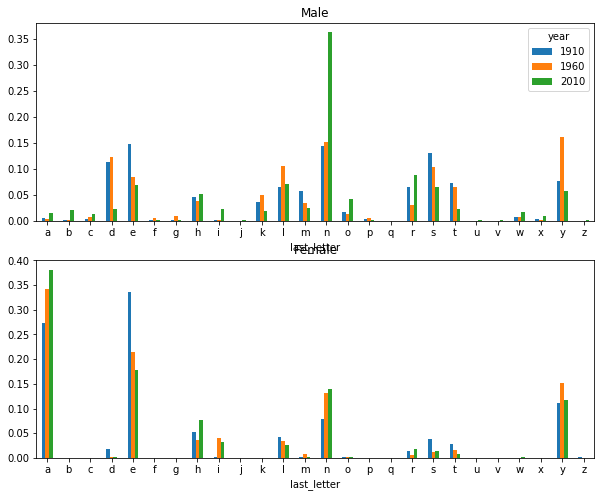

In [90]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

### 从20世纪60年代开始，以字母"n"结尾的男孩名字出现了显著的增长。

In [91]:
#按年度和性别对其规范化处理，并在男孩名字中选取几个字母，最后进行转置以便将各个列做成一个时间序列：
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts[:5]

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


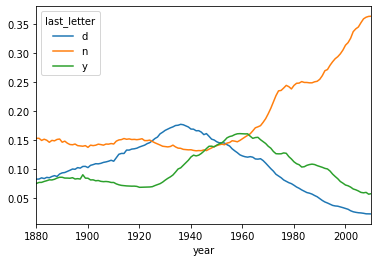

In [92]:
dny_ts.plot()

#### 变成女孩名字的男孩名字（以及相反的情况）

In [93]:
#回到top1000数据集，找出其中以"lesl"开头的一组名字：
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [94]:
#利用这个结果过滤其他的名字，并按名字分组计算出生数以查看相对频率
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [95]:
#按性别和年度进⾏聚合，并按年度进行规范化处理：
table = filtered.pivot_table('births', index='year',columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


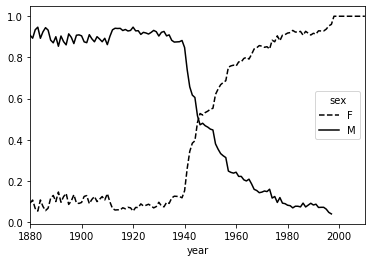

In [96]:
table.plot(style={'M': 'k-', 'F': 'k--'})